In [2]:
import numpy as np

from py21cmemu import Emulator

import matplotlib.pyplot as plt

from matplotlib import rcParams
import matplotlib.patches as mpatches
rcParams.update({'font.size' : 40})

In [3]:
test_sample = np.load('Test_data_sample.npz')
print(list(test_sample.keys()))

['X_test', 'parameters', 'limits', 'Ts', 'Tb', 'PS', 'tau', 'UVLFs', 'xHI']


In [4]:
test_params = test_sample['X_test']

In [5]:
Tb_true = test_sample['Tb']
xHI_true = test_sample['xHI']
tau_true = test_sample['tau']
PS_true = test_sample['PS']

In [6]:
emu = Emulator()
normed_input_params, output, output_errors = emu.predict(test_params, verbose = True, )

2026-01-28 14:10:59.133321: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-28 14:10:59.348794: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-28 14:11:00.014267: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2026-01-28 14:11:00.014342: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2026-01-28 14:11:00.019618: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

4/4 [==============================] - 1s 76ms/step


In [7]:
theta = np.random.rand(9*5).reshape((5,9))
theta, out, out_err = emu.predict(theta)

In [8]:
Tb_emu = output['Tb']
xHI_emu = output['xHI']
zs = output['redshifts']
tau_emu = output['tau']
PS_emu = output['PS']

In [18]:
def plot_true_vs_emu(x, y_true, y_emu, x_label,
                     y_label, xlims = None, N = 10, offset = 0,
                     cs = None, leg_loc = (0.5,0.5)):
    if cs is None:
        cs = ['k','lime','b', 'orange', 'cyan', 'magenta', 'grey', 'pink', 'darkred', 'coral']
    y_diff = abs(y_true - y_emu)
    fig, axs = plt.subplots(nrows = 2, ncols = 1, sharex = True,figsize = (14,12), gridspec_kw=dict(height_ratios=[3,2], hspace=0))
    axs = axs.flatten()

    diff_err_z = np.nanpercentile(y_diff, [2.5, 16,50, 84, 97.5], axis = 0)
    for i, c in zip(range(N), cs):
        if i == N-1:
            labels = ['21cmEMU', 'Test Set']
        else:
            labels = [None, None]
        axs[0].plot(x, y_true[i + offset, :], lw = 3, color = c, label = labels[1], alpha = 0.5)
        axs[1].plot(x, y_diff[i + offset, :], ls = '-.', alpha = 0.5, lw = 2, color = c)
        axs[0].plot(x, y_emu[i + offset, :], lw = 2, ls = '-.', color = c, label = labels[0], alpha = 0.8)

    axs[0].legend(loc = leg_loc, frameon = False)#framealpha=0.3)
    axs[1].plot(x, diff_err_z[2, :], ls = '--', lw = 3, color = 'k', label = r'Median')
    axs[1].fill_between(x, diff_err_z[1, :], diff_err_z[3, :], color = 'k', alpha = 0.2, label = r'68% CI')
    axs[1].fill_between(x, diff_err_z[0, :], diff_err_z[4, :], color = 'k', alpha = 0.1, label = r'95% CI')

    handles = [mpatches.Patch(color='k', label='68% CI', alpha = 0.3),
              mpatches.Patch(color='k', label='95% CI', alpha = 0.1),
              ]
    plt.legend(handles=handles, loc = (0.6,0.5), frameon = False)
    axs[0].set_ylabel(y_label)
    axs[1].set_ylabel(r'Abs Diff')
    axs[1].set_xlabel(x_label)
    
    if xlims is not None:
        plt.xlim(xlims[0], xlims[1])
    else:
        plt.xlim(min(x), max(x))
    plt.tight_layout()
    plt.show()

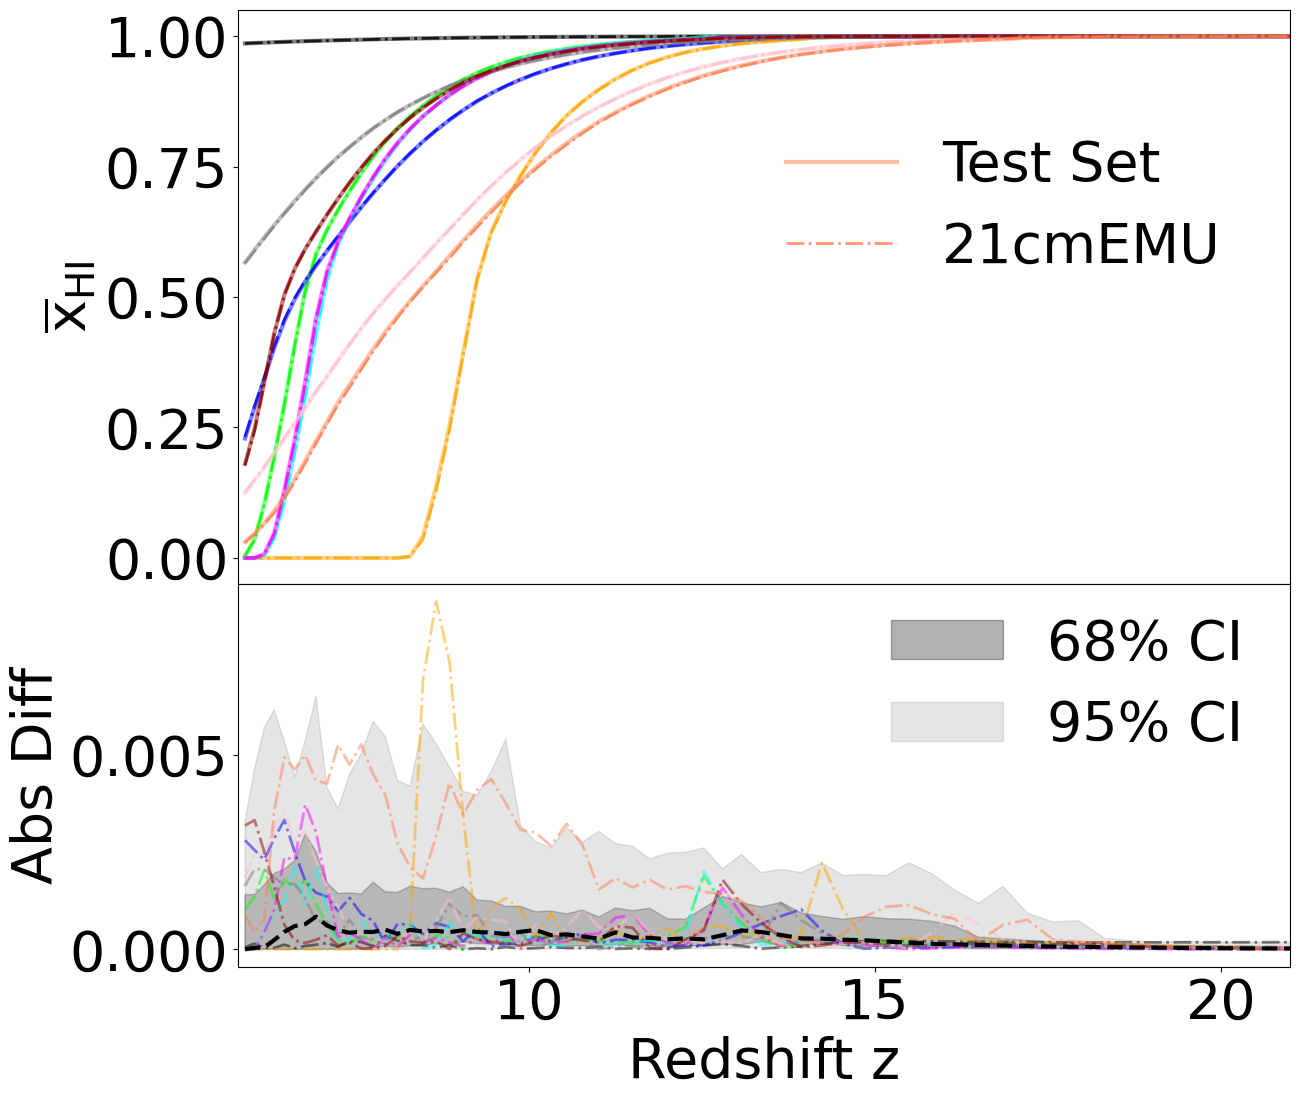

In [19]:
plot_true_vs_emu(zs, xHI_true, xHI_emu, r'Redshift z', r'$\overline{\mathrm{x}}_{\rm{HI}}$', xlims = [5.8, 21])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

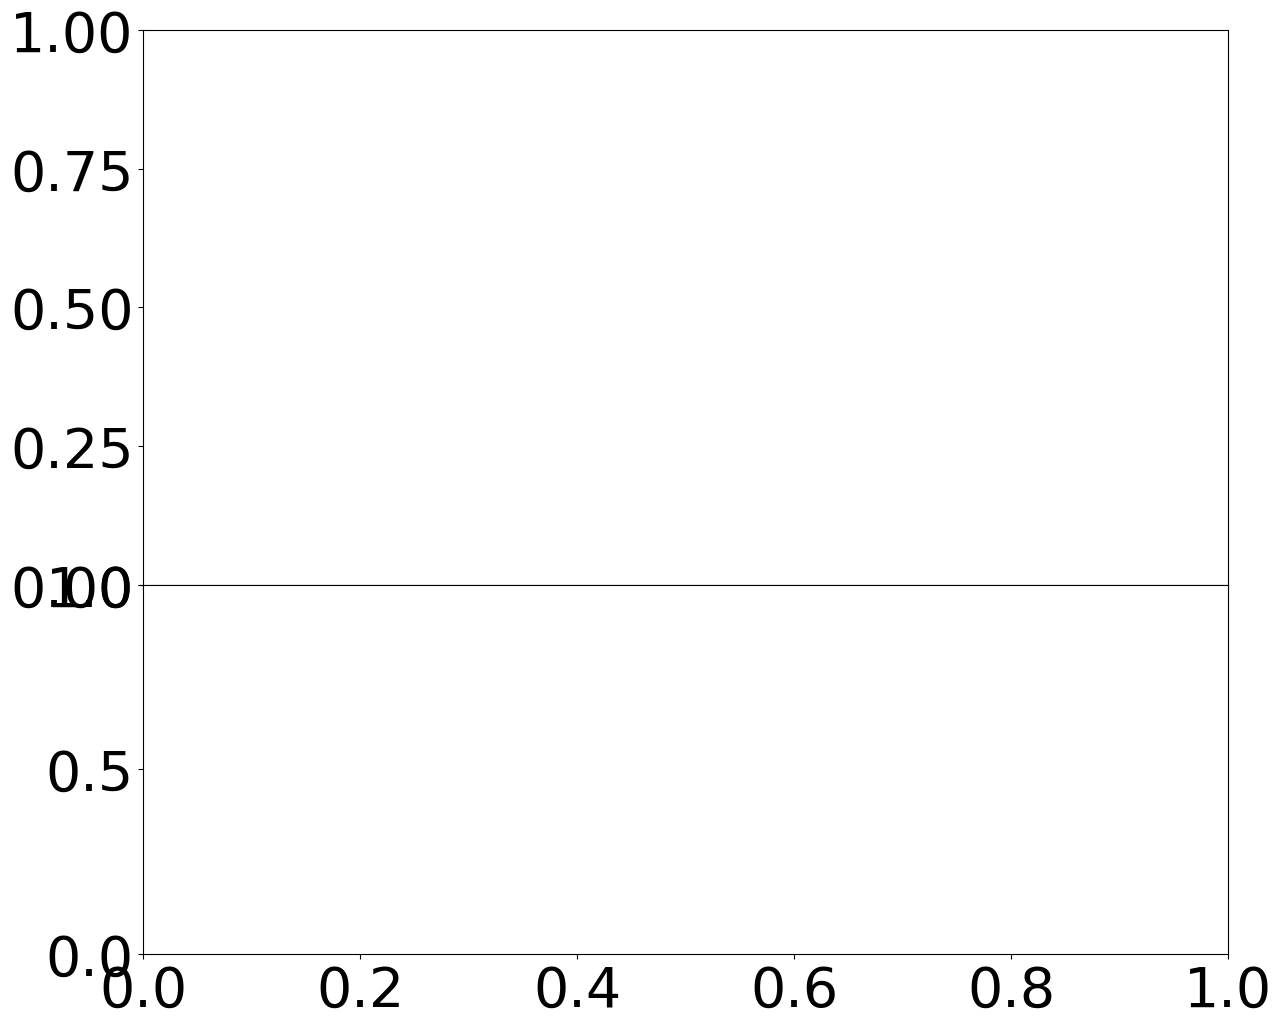

In [53]:
plot_true_vs_emu(zs, tau_true, tau_emu, r'Redshift z', r'$\mathrm{\tau}$', xlims = [5.8, 21])